# Simulations of a Markov Model


# "The Spread of Hepatitis C Virus" - I. Coutin, L Decreusefond, J.S Dhersin

Maxime TCHIBOZO

# 1  - Numerical Resolution of the Differential System

The differential system we aim to solve is the following:


($S_{r}(x^{0})$)
$
    \begin{cases}
        \psi_{1}'(t) = r + \lambda p_{I}\frac{\psi_{1}(t)}{\psi_{1}(t)+\psi_{2}(t)} - \mu_{1}\psi_{1}(t)+ \alpha p \frac{\psi_{1}(t)\psi_{2}(t)}{\psi_{1}(t)+\psi_{2}(t)}, \\ 
        \psi_{1}(0) = x_{1}^{0}, \\
        \psi_{2}'(t) = \lambda (1- p_{I}\frac{\psi_{1}(t)}{\psi_{1}(t)+\psi_{2}(t)} - \mu_{2}\psi_{2}(t) - \alpha p \frac{\psi_{1}(t)\psi_{2}(t)}{\psi_{1}(t)+\psi_{2}(t)}, \\ 
        \psi_{2}(0) = x_{2}^{0}. \\
        \end{cases}
$
        
with $x_{0} = (x_{1}^{0},x_{2}^{0})$



According to Theorem 4.1, there is a unique solution to $S_{r}(x^{0})$

In [17]:
alpha = 1
mu_1 = 0.1
mu_2 = 0.2
r = 1
lmbda = 5
p_I = 0.8

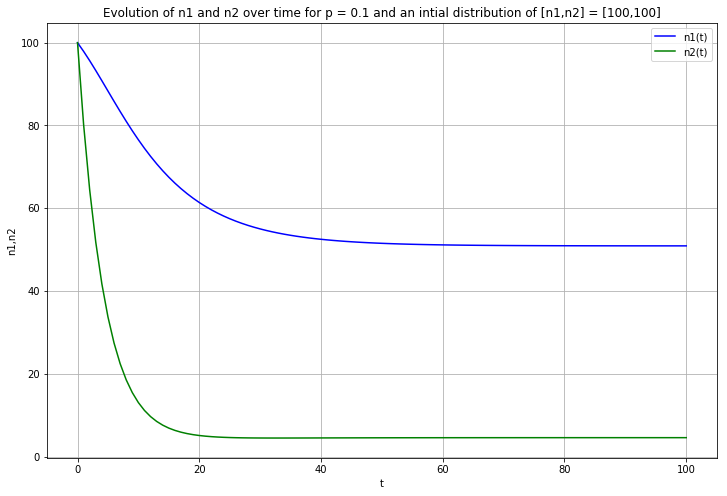

In [18]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def f(y,p,t):
    #y is a 2d vector
    #p is the prevalence
    return np.array([r+lmbda*p_I*y[0]/(y[0]+y[1])-mu_1*y[0]+alpha*p*y[0]*y[1]/(y[0]+y[1]),lmbda*(1-p_I*y[0]/(y[0]+y[1]))-mu_2*y[1]-alpha*p*y[0]*y[1]/(y[0]+y[1])])

def f_p(y,t):
    #p = 0.1
    return f(y,0.1,t)

t = np.linspace(0, 100, 101)

sol = odeint(f_p, y0=np.array([100,100]), t=t)
plt.figure(figsize=(12,8))
plt.plot(t, sol[:, 0], 'b', label='n1(t)')
plt.plot(t, sol[:, 1], 'g', label='n2(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('n1,n2')

plt.title("Evolution of n1 and n2 over time for p = 0.1 and an intial distribution of [n1,n2] = [100,100]")
plt.grid()
plt.show()


We now will plot the prevalence $(\frac{n_{1}}{n_{1}+n_{2}})_{\infty}$ as a function of p (i.e the fraction of infected in the population in the stationary regime)

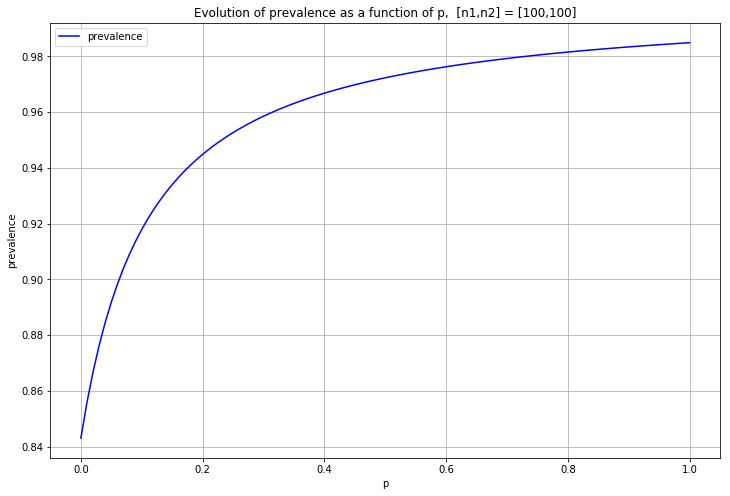

In [19]:
def prevalence(p):
    sol = odeint(lambda y,t:f(y=y,t=t,p=p), y0=np.array([100,100]), t=t)
    return sol[-1][0]/(sol[-1][0]+sol[-1][1])

P = np.linspace(0,1,101)
sol_numerical = [prevalence(p) for p in P]
plt.figure(figsize=(12,8))
plt.plot(P, sol_numerical, 'b', label='prevalence')
plt.legend(loc='best')
plt.xlabel('p')
plt.ylabel('prevalence')

plt.title("Evolution of prevalence as a function of p,  [n1,n2] = [100,100]")
plt.grid()
plt.show()



# 2 - Markov Process simulation

In [27]:
alpha = 1
mu_1 = 0.1
mu_2 = 0.2
r = 1
lmbda = 5
p_I = 0.8


def simulation(n_init,p):
    #initialization
    n1 = n_init[0]
    n2 = n_init[1]
    t = 0
    T = [0]
    N1 = [n1]
    N2 = [n2]
    #recursive
    while t < 100:
        q1 = r + lmbda*p_I*n1/(n1+n2)
        q2 = mu_1*n1
        q3 = alpha*p*n2*n1/(n1+n2)
        q4 = lmbda*(1-p_I*n1/(n1+n2))
        q5 = mu_2*n2
        q = q1+q2+q3+q4+q5
        probas = np.array([q1,q2,q3,q4,q5])/q
        i = np.random.choice([i for i in range(5)],size=1,p=probas)
        if i == 0: #a new infected enters the environment
            n1 += 1
        elif i == 1: #an infected leaves the environment
            n1 -=1
        elif i == 2: #a susceptible becomes infected
            n1 += 1
            n2 -=1
        elif i == 3: #a susceptible enters the environment
            n2 += 1
        elif i == 4: #a susceptible leaves the environment
            n2 -=1
        t_k = np.random.exponential(1/q) #waiting time in the current state
        t+=t_k
        N1.append(n1)
        N2.append(n2)
        T.append(t)

    return N1,N2,T

sim = simulation(np.array([100,100]),0.1)


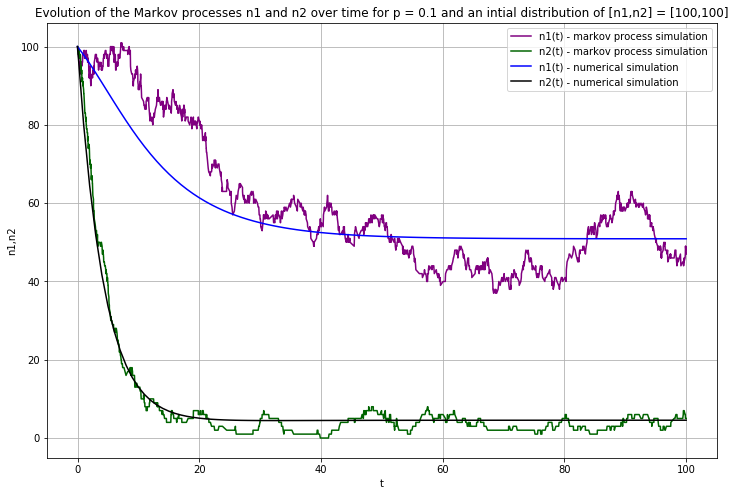

In [28]:
T = sim[2]
plt.figure(figsize=(12,8))
plt.plot(T, sim[0], 'purple', label='n1(t) - markov process simulation')
plt.plot(T, sim[1], 'darkgreen', label='n2(t) - markov process simulation')
plt.plot(t, sol[:, 0], 'b', label='n1(t) - numerical simulation')
plt.plot(t, sol[:, 1], 'black', label='n2(t) - numerical simulation')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('n1,n2')
plt.title("Evolution of the Markov processes n1 and n2 over time for p = 0.1 and an intial distribution of [n1,n2] = [100,100]")
plt.grid()
plt.savefig('foo.png')
plt.show()


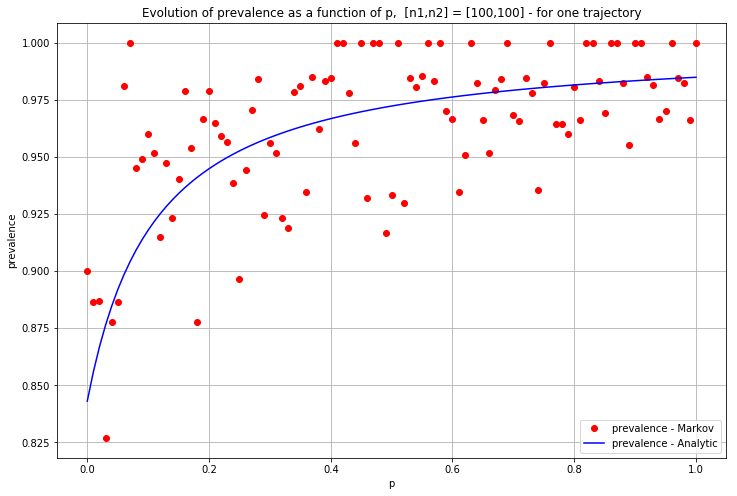

In [29]:
def prevalence_2(p):
    sol = simulation([100,100],p)
    return sol[0][-1]/(sol[0][-1]+sol[1][-1])
    
P = np.linspace(0,1,101)
sol_2 = [prevalence_2(p) for p in P]


plt.figure(figsize=(12,8))
plt.plot(P, sol_2, "ro", label='prevalence - Markov')
plt.plot(P, sol_numerical, 'b', label='prevalence - Analytic')
plt.legend(loc='best')
plt.xlabel('p')
plt.ylabel('prevalence')

plt.title("Evolution of prevalence as a function of p,  [n1,n2] = [100,100] - for one trajectory")
plt.grid()
plt.show()



In [30]:
#ETAPE TRES CALCULATOIRE 

P = np.linspace(0,1,100)

prev = np.zeros(100)
for i in range(100):
    prev += np.array([prevalence_2(p) for p in P])
prev = prev/100


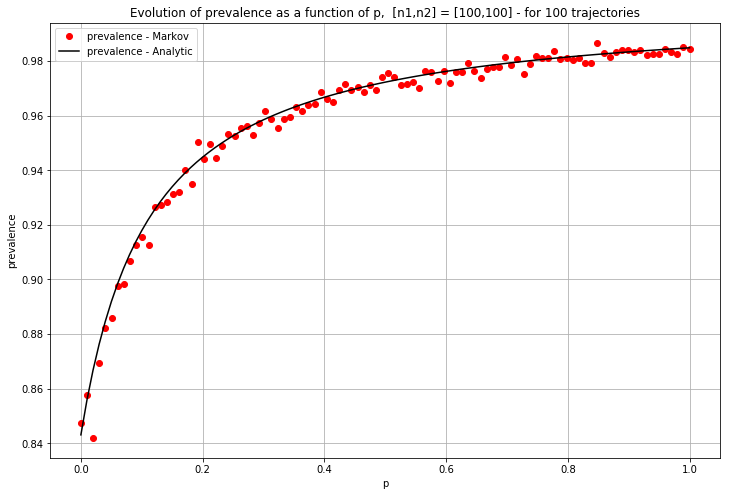

In [31]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,100), prev, "ro", label='prevalence - Markov')
plt.plot(np.linspace(0,1,101), sol_numerical, 'black', label='prevalence - Analytic')
plt.legend(loc='best')
plt.xlabel('p')
plt.ylabel('prevalence')

plt.title("Evolution of prevalence as a function of p,  [n1,n2] = [100,100] - for 100 trajectories")
plt.grid()
plt.savefig("bar.png")
plt.show()
